## Observations and Insights 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
combine.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
combine["Mouse ID"].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [13]:
Summary = combine.groupby('Drug Regimen')
MeanVol = Summary['Tumor Volume (mm3)'].mean()
MedianVol = Summary['Tumor Volume (mm3)'].median() 
VarVol = Summary['Tumor Volume (mm3)'].var()
SDVol = Summary['Tumor Volume (mm3)'].std()
SEMVol = Summary['Tumor Volume (mm3)'].sem()

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stats = pd.DataFrame({"Mean": MeanVol, "Median":MedianVol,  "Variance":VarVol, "Standard Deviation": SDVol, "SEM": SEMVol})

summary_stats





# Using the aggregation method, produce the same summary statistics in a single line


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

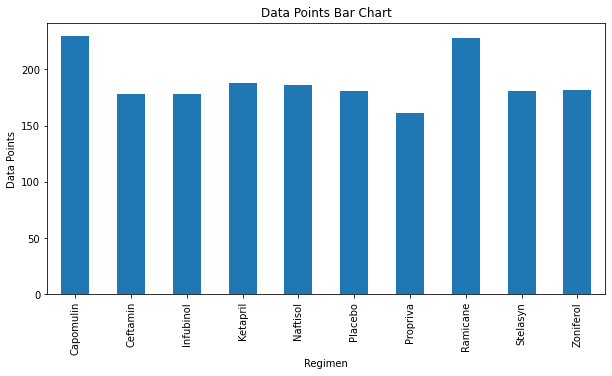

<Figure size 432x288 with 0 Axes>

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
DataPoint = combine.groupby(["Drug Regimen"]).count()["Mouse ID"]
DataPoint.plot(kind="bar", figsize = (10,5))

plt.title("Data Points Bar Chart")
plt.xlabel("Regimen")
plt.ylabel("Data Points")

plt.show()
plt.tight_layout()

In [21]:
DataPoint

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Data Points')

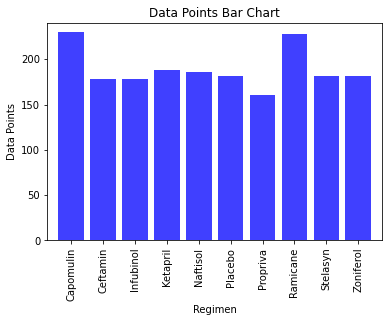

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
DataPoints = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
xaxis = np.arange(len(DataPoints))

plt.bar(xaxis, DataPoints, color='b', alpha=0.75, align='center')

ticks = [value for value in xaxis]
plt.xticks(ticks, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(xaxis)-0.25)

plt.ylim(0, max(DataPoints)+10)

plt.title("Data Points Bar Chart")
plt.xlabel("Regimen")
plt.ylabel("Data Points")

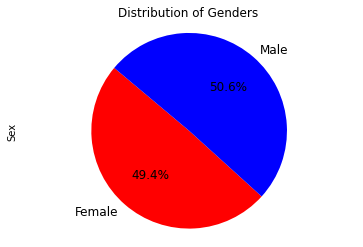

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Genders = combine.groupby('Sex')
GenderCount = pd.DataFrame(Genders['Sex'].count())

GenderCount.plot(kind='pie', 
                 y='Sex', 
                 title="Distribution of Genders",
                 startangle=140,
                 autopct='%1.1f%%',
                 shadow = False, 
                 fontsize = 12, 
                 colors =["red","blue"],
                 legend =False)

plt.axis("equal")
plt.savefig("PandaPieChart.png")
plt.show()

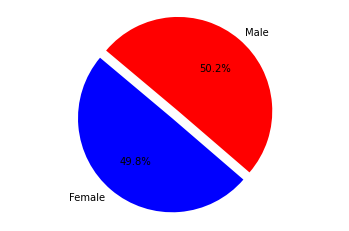

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sizes,
        explode =(0.1,0),
        labels = ["Female","Male"],
        colors = ["blue","red"],
        autopct="%1.1f%%",
        shadow = False,
        startangle = 140)
plt.axis("equal")
plt.savefig("PyplotPieChart.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
TopTreat = combine[combine["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
TopTreat = TopTreat.sort_values(["Timepoint"],ascending = True)
TopTreatData = TopTreat[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
TopTreatData

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [50]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    # add subset 
    # Determine outliers using upper and lower bounds
TopTreatment = TopTreatData.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']

TopTreatmentDF = TopTreatment.to_frame()
TopTreatmentDF

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

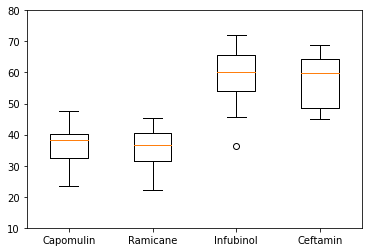

In [58]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
TOP = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
DF = TopTreatmentDF.reset_index()
Lists = DF.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
ListsDF = pd.DataFrame(Lists)
ListsDF = ListsDF.reindex(TOP)
Volumes = [vol for vol in ListsDF['Tumor Volume (mm3)']]

plt.boxplot(Volumes, labels = TOP)
plt.ylim(10,80)

plt.savefig("Quartile.png")
plt.show

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

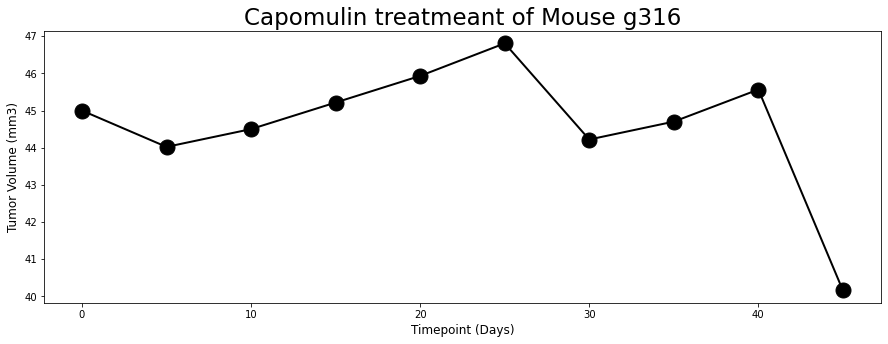

In [68]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = combine.loc[combine["Drug Regimen"] == "Capomulin",:]
LSP_DF = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "g316",:]


Timepoint = LSP_DF["Timepoint"]
Size = LSP_DF["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 5))
plt.title('Capomulin treatmeant of Mouse g316',fontsize =23)
plt.plot(Timepoint, Size,linewidth=2, markersize=15,marker="o",color="black", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =12)
plt.ylabel('Tumor Volume (mm3)',fontsize =12)

plt.savefig("LinePlot.png")
plt.show

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

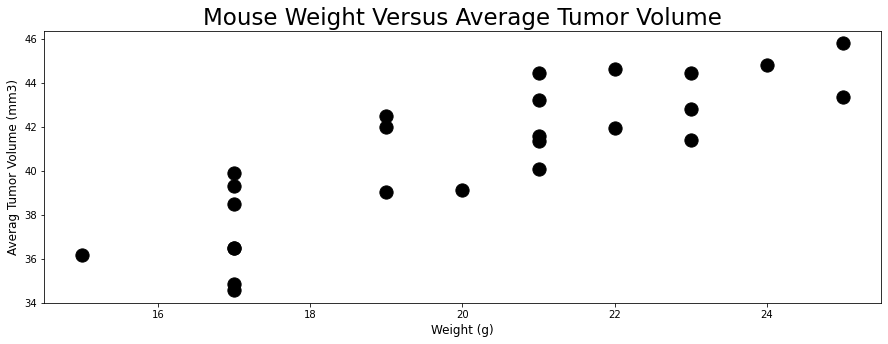

In [69]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(15, 5))

ATM =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=10
plt.scatter(ATM['Weight (g)'],ATM['Tumor Volume (mm3)'],s=175, color="black")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =23)
plt.xlabel('Weight (g)',fontsize =12)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =12)

## Correlation and Regression

In [71]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(ATM['Weight (g)'],ATM['Tumor Volume (mm3)'])[0],2)
corr

0.84

In [74]:
xval = ATM['Weight (g)']
yval = ATM['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xval, yval)
regressionvalue = xval * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.95x + 21.55


The r-squared is: 0.7088568047708717


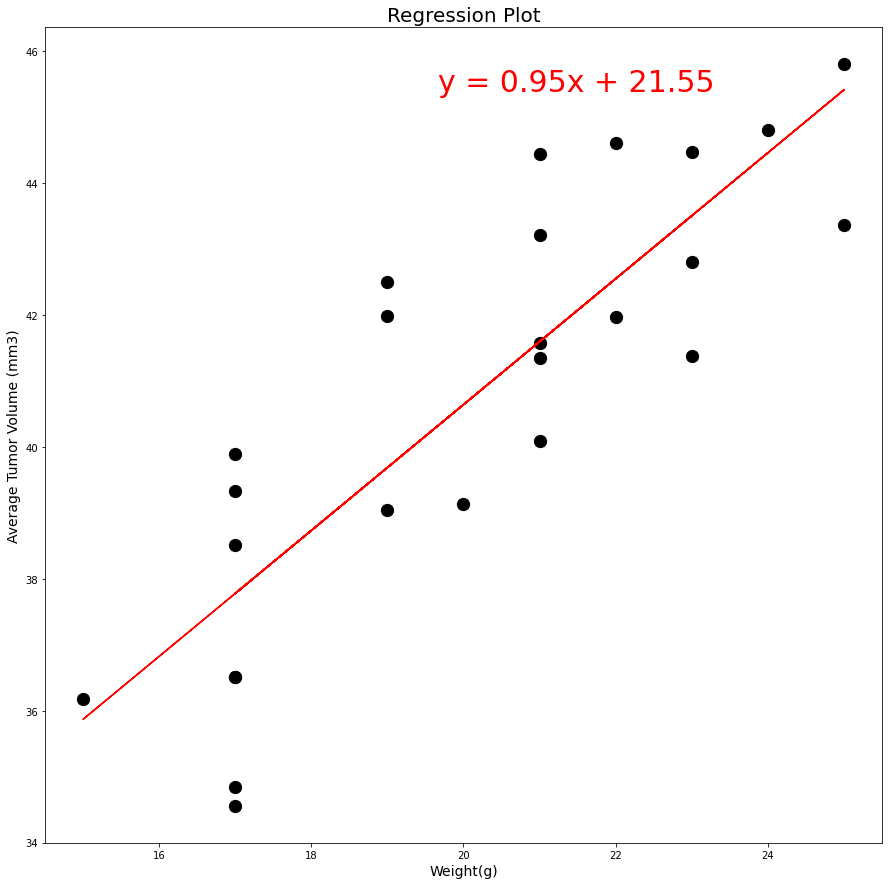

In [79]:
fig1, ax1 = plt.subplots(figsize=(15, 15))
plt.scatter(xval,yval,s=150, color="black")
plt.plot(xval,regressionvalue,"r-")
plt.title('Regression Plot',fontsize =20)
plt.xlabel('Weight in grams (g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")


plt.savefig("Regression Plot")
plt.show()